In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import Rectangle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel('D:\D\Rendy\DS\Cikarang Dry Port - CISS Autogate Week35 2023.xlsx')

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RFID              3199 non-null   int64 
 1   TRUCK NO.         3199 non-null   object
 2   OCR               3199 non-null   object
 3   TYPE TRUCK        3199 non-null   object
 4   GATE NO.          3199 non-null   object
 5   STATUS            3199 non-null   object
 6   GATE PROCESS      3199 non-null   object
 7   ALERT             402 non-null    object
 8   REMARK OPERATOR   363 non-null    object
 9   ORDER TYPE        3199 non-null   object
 10  ACTUAL CONTAINER  402 non-null    object
 11  DATETIME          3199 non-null   object
dtypes: int64(1), object(11)
memory usage: 300.0+ KB


In [4]:
data1.head()

,RFID,TRUCK NO.,OCR,TYPE TRUCK,GATE NO.,STATUS,GATE PROCESS,ALERT,REMARK OPERATOR,ORDER TYPE,ACTUAL CONTAINER,DATETIME
0,31631,B9089BEI,00000000000,Truck Losbak,GATE 3,SUCCESS,Auto,NaN,NaN,Import Delivery,NaN,2023-09-03 23:03:37.833
1,34522,B9583UIZ,FCIU7178890,Truck Full Container,GATE 1,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,FCIU7178890,2023-09-03 22:01:09.917
2,36308,B9484UEM,SEKU4980843,Truck Full Container,GATE 2,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,SEKU4980843,2023-09-03 21:58:44.470
3,36308,B9484UEM,00000000000,Truck Losbak,GATE 3,SUCCESS,Auto,NaN,NaN,Import Delivery,NaN,2023-09-03 21:41:07.773
4,34522,B9583UIZ,00000000000,Truck Losbak,GATE 4,SUCCESS,Auto,NaN,NaN,Import Delivery,NaN,2023-09-03 21:25:58.783


In [5]:
list_gate = data1['GATE NO.'].unique()
#list_gate = pd.DataFrame(data1['GATE NO.'].unique())
#list_gate = list_gate.rename(columns={0:'GATE'}).sort_values(by=['GATE']).reset_index(drop=True)

In [6]:
list_gate 

array(['GATE 3', 'GATE 1', 'GATE 2', 'GATE 4', 'GATE 5'], dtype=object)

In [7]:
pd.DataFrame(pd.Series({col:data1[col].unique() for col in data1})).reset_index()

,index,0
0,RFID,"[31631, 34522, 36308, 36915, 1310643804, 20646..."
1,TRUCK NO.,"[B9089BEI, B9583UIZ, B9484UEM, D9392AG, A9056U..."
2,OCR,"[00000000000, FCIU7178890, SEKU4980843, ZCSU79..."
3,TYPE TRUCK,"[Truck Losbak, Truck Full Container]"
4,GATE NO.,"[GATE 3, GATE 1, GATE 2, GATE 4, GATE 5]"
5,STATUS,[SUCCESS]
6,GATE PROCESS,"[Auto, Input Manual]"
7,ALERT,"[nan, DOCUMENT BC NOT BC2.0, PLEASE RELEASE DO..."
8,REMARK OPERATOR,"[nan, Ocr gagal, -, --, 0, gagal, gaagl, -gaga..."
9,ORDER TYPE,"[Import Delivery, Delivery, Import Shuttle, Ex..."


In [8]:
data1['ACTUAL CONTAINER'] = data1['ACTUAL CONTAINER'].str.upper() 

In [9]:
df_success = data1.drop(data1[data1['GATE PROCESS']=='Master CID'].index)

list_data2 = list(df_success.columns)


for column in list_data2:
    df_success.loc[df_success[column]=='-', column] = np.nan
    df_success.loc[df_success[column]=='--', column] = np.nan

In [10]:
df_success['GATE PROCESS'].unique()

array(['Auto', 'Input Manual'], dtype=object)

In [11]:
#df_success = df_success.drop(df_success[(df_success['REMARK OPERATOR']=='-') | (df_success['REMARK OPERATOR']==0) | (df_success['REMARK OPERATOR']=='00000000000')].index)

In [12]:
df_success['Date'] = pd.to_datetime(df_success['DATETIME']).dt.date
df_success['Time'] = pd.to_datetime(df_success['DATETIME']).dt.time
df_success['Hour'] = pd.to_datetime(df_success['DATETIME']).dt.hour
df_success['Minute'] = pd.to_datetime(df_success['DATETIME']).dt.minute

In [13]:
df_success

,RFID,TRUCK NO.,OCR,TYPE TRUCK,GATE NO.,STATUS,GATE PROCESS,ALERT,REMARK OPERATOR,ORDER TYPE,ACTUAL CONTAINER,DATETIME,Date,Time,Hour,Minute
0,31631,B9089BEI,00000000000,Truck Losbak,GATE 3,SUCCESS,Auto,NaN,NaN,Import Delivery,NaN,2023-09-03 23:03:37.833,2023-09-03,23:03:37.833000,23,3
1,34522,B9583UIZ,FCIU7178890,Truck Full Container,GATE 1,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,FCIU7178890,2023-09-03 22:01:09.917,2023-09-03,22:01:09.917000,22,1
2,36308,B9484UEM,SEKU4980843,Truck Full Container,GATE 2,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,SEKU4980843,2023-09-03 21:58:44.470,2023-09-03,21:58:44.470000,21,58
3,36308,B9484UEM,00000000000,Truck Losbak,GATE 3,SUCCESS,Auto,NaN,NaN,Import Delivery,NaN,2023-09-03 21:41:07.773,2023-09-03,21:41:07.773000,21,41
4,34522,B9583UIZ,00000000000,Truck Losbak,GATE 4,SUCCESS,Auto,NaN,NaN,Import Delivery,NaN,2023-09-03 21:25:58.783,2023-09-03,21:25:58.783000,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,34972,B9361UIZ,00000000000,Truck Losbak,GATE 1,SUCCESS,Auto,NaN,NaN,Import Shuttle,NaN,2023-08-28 00:51:37.073,2023-08-28,00:51:37.073000,0,51
3195,1311351276,B9989UIV,00000000000,Truck Losbak,GATE 2,SUCCESS,Auto,NaN,NaN,Import Shuttle,NaN,2023-08-28 00:50:44.090,2023-08-28,00:50:44.090000,0,50
3196,34480,B9307UIY,00000000000,Truck Losbak,GATE 3,SUCCESS,Input Manual,TRUCK CANNOT LOSBAK,-,Import Shuttle,CSNU1217351,2023-08-28 00:39:00.883,2023-08-28,00:39:00.883000,0,39
3197,34972,B9361UIZ,00000000000,Truck Losbak,GATE 4,SUCCESS,Input Manual,TRUCK CANNOT LOSBAK,-,Import Shuttle,OOLU0580879,2023-08-28 00:34:26.673,2023-08-28,00:34:26.673000,0,34


In [14]:
data2 = data1.drop(data1[data1['GATE PROCESS']=='Master CID'].index)

In [15]:
data3 = data1.drop(data1[data1['GATE PROCESS']=='Not Process'].index)

In [16]:
df_gate_total = pd.DataFrame(data3['GATE NO.'].value_counts()).reset_index()
df_gate_total

,index,GATE NO.
0,GATE 2,977
1,GATE 3,891
2,GATE 4,710
3,GATE 1,620
4,GATE 5,1


In [17]:
df_gate_total = df_gate_total.rename(columns={'index':'GATE','GATE NO.':'Total'}).sort_values(by=['GATE'])
df_gate_total.reset_index(drop=True, inplace=True)
df_gate_total

,GATE,Total
0,GATE 1,620
1,GATE 2,977
2,GATE 3,891
3,GATE 4,710
4,GATE 5,1


In [18]:
df_gate_auto = pd.DataFrame(df_success[df_success['GATE PROCESS'] == 'Auto']['GATE NO.'].value_counts()).reset_index()


In [19]:
df_gate_auto = df_gate_auto.rename(columns={'index':'GATE','GATE NO.':'Auto'}).sort_values(by=['GATE'])
df_gate_auto.reset_index(drop=True, inplace=True)

In [20]:
#df_gate_auto.loc[len(df_gate_auto.index)] = ['GATE 5', 0] 

In [21]:
df_gate_auto

,GATE,Auto
0,GATE 1,514
1,GATE 2,898
2,GATE 3,781
3,GATE 4,603
4,GATE 5,1


In [22]:
df_gate_manuals = df_success.drop(df_success[(df_success['OCR']==df_success['ACTUAL CONTAINER'])].index)

In [23]:
df_gate_manual = pd.DataFrame(df_gate_manuals[df_gate_manuals['GATE PROCESS'] == 'Input Manual']['GATE NO.'].value_counts()).reset_index()

In [24]:
df_gate_manual = df_gate_manual.rename(columns={'index':'GATE','GATE NO.':'Manual (OCR Problem)'}).sort_values(by=['GATE'])
df_gate_manual.reset_index(drop=True, inplace=True)

In [25]:
#df_gate_manual.loc[len(df_gate_manual.index)] = ['GATE 4', 0]
#df_gate_manual.loc[len(df_gate_manual.index)] = ['GATE 5', 0]

In [26]:
df_gate_manual

,GATE,Manual (OCR Problem)
0,GATE 1,100
1,GATE 2,68
2,GATE 3,106
3,GATE 4,105


In [27]:
df_manuals_others = df_success.drop(df_success[(df_success['OCR']!=df_success['ACTUAL CONTAINER'])].index)

In [28]:
df_manual_others = pd.DataFrame(df_manuals_others[df_manuals_others['GATE PROCESS'] == 'Input Manual']['GATE NO.'].value_counts()).reset_index()

In [29]:
df_manual_others = df_manual_others.rename(columns={'index':'GATE','GATE NO.':'Manual (Others)'}).sort_values(by=['GATE'])
df_gate_manual.reset_index(drop=True, inplace=True)

In [30]:
#df_manual_others.loc[len(df_manual_others.index)] = ['GATE 5', 0]

In [31]:
df_manual_others

,GATE,Manual (Others)
1,GATE 1,6
0,GATE 2,11
2,GATE 3,4
3,GATE 4,2


In [32]:
df_master = pd.DataFrame(data1[data1['GATE PROCESS'] == 'Master CID']['GATE NO.'].value_counts()).reset_index()

In [33]:
df_master = df_master.rename(columns={'index':'GATE','GATE NO.':'Master CID'}).sort_values(by=['GATE'])
df_master.reset_index(drop=True, inplace=True)

In [34]:
df_master.loc[len(df_master.index)] = ['GATE 4', 0]

In [35]:
df_master 

,GATE,Master CID
0,GATE 4,0


In [36]:
df_gate_summary = pd.merge(pd.merge(pd.merge(pd.merge(df_gate_auto,df_gate_manual,on='GATE', how = 'outer'),df_manual_others, on='GATE', how ='outer'),df_master, on='GATE', how ='outer'),df_gate_total,on='GATE')

In [37]:
df_gate_summary2 = df_gate_summary.fillna(0)
df_gate_summary2

,GATE,Auto,Manual (OCR Problem),Manual (Others),Master CID,Total
0,GATE 1,514,100.0,6.0,0.0,620
1,GATE 2,898,68.0,11.0,0.0,977
2,GATE 3,781,106.0,4.0,0.0,891
3,GATE 4,603,105.0,2.0,0.0,710
4,GATE 5,1,0.0,0.0,0.0,1


In [38]:
df_gate_summary2

,GATE,Auto,Manual (OCR Problem),Manual (Others),Master CID,Total
0,GATE 1,514,100.0,6.0,0.0,620
1,GATE 2,898,68.0,11.0,0.0,977
2,GATE 3,781,106.0,4.0,0.0,891
3,GATE 4,603,105.0,2.0,0.0,710
4,GATE 5,1,0.0,0.0,0.0,1


In [39]:
df_gate_summary2['Auto'] = df_gate_summary2['Auto'].astype(int)
df_gate_summary2['Manual (Others)'] = df_gate_summary2['Manual (Others)'].astype(int)
df_gate_summary2['Master CID'] = df_gate_summary2['Master CID'].astype(int)
df_gate_summary2['Manual (OCR Problem)'] = df_gate_summary2['Manual (OCR Problem)'].astype(int)

In [40]:
df_gate_summary2

,GATE,Auto,Manual (OCR Problem),Manual (Others),Master CID,Total
0,GATE 1,514,100,6,0,620
1,GATE 2,898,68,11,0,977
2,GATE 3,781,106,4,0,891
3,GATE 4,603,105,2,0,710
4,GATE 5,1,0,0,0,1


In [41]:
df_gate = df_gate_summary.set_index('GATE')

In [42]:
df_gate.drop('Total',axis=1,inplace=True)

In [43]:
df_gate[np.isnan(df_gate)] = 0

In [44]:
df_gate

,Auto,Manual (OCR Problem),Manual (Others),Master CID
GATE,,,,
GATE 1,514,100.0,6.0,0.0
GATE 2,898,68.0,11.0,0.0
GATE 3,781,106.0,4.0,0.0
GATE 4,603,105.0,2.0,0.0
GATE 5,1,0.0,0.0,0.0


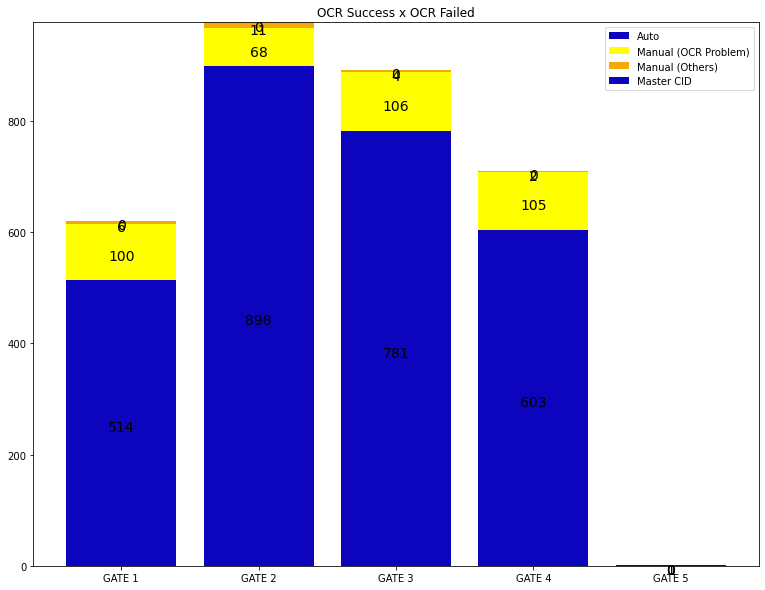

In [45]:
fig, ax = plt.subplots(figsize=(13,10))
list = ['#0d04bd','#ffff00','#f5a905']


bottom = np.zeros(len(df_gate))

for i, col in enumerate(df_gate.columns):
  ax.bar(
      df_gate.index, df_gate[col], bottom=bottom, label=col,color = list[i % len(list)] ,)
  bottom += np.array(df_gate[col])



# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.

for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height()/2 + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='black',
      size=14
  )

ax.set_title('OCR Success x OCR Failed')
ax.legend()

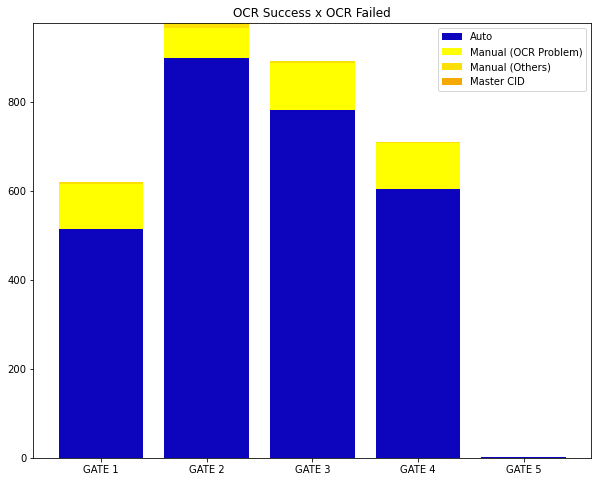

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
list = ['#0d04bd','#ffff00','#fce005','#f5a905']


bottom = np.zeros(len(df_gate))

for i, col in enumerate(df_gate.columns):
  ax.bar(
      df_gate.index, df_gate[col], bottom=bottom, label=col,color = list[i % len(list)] ,)
  bottom += np.array(df_gate[col])



# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15

#for p in ax.get_children()[:-1]:  # skip the last patch as it is the background
 #   if isinstance(p, Rectangle):
  #      x, y = p.get_xy()
   #     w, h = p.get_width(), p.get_height()
    #    if h > 10:  # anything that have a height of 0 will not be annotated
     #       ax.text(x + 0.5 * w, y + 0.5 * h, round(p.get_height()), va='center', ha='center', size=14)

ax.set_title('OCR Success x OCR Failed')
ax.legend()

In [47]:
data_manual = df_success.loc[df_success['GATE PROCESS']=='Input Manual'].reset_index(drop=True)

In [48]:
data_manual

,RFID,TRUCK NO.,OCR,TYPE TRUCK,GATE NO.,STATUS,GATE PROCESS,ALERT,REMARK OPERATOR,ORDER TYPE,ACTUAL CONTAINER,DATETIME,Date,Time,Hour,Minute
0,34522,B9583UIZ,FCIU7178890,Truck Full Container,GATE 1,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,FCIU7178890,2023-09-03 22:01:09.917,2023-09-03,22:01:09.917000,22,1
1,36308,B9484UEM,SEKU4980843,Truck Full Container,GATE 2,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,SEKU4980843,2023-09-03 21:58:44.470,2023-09-03,21:58:44.470000,21,58
2,3131466465,B9365UIZ,IRHU4868510,Truck Full Container,GATE 1,SUCCESS,Input Manual,CONTAINER DOES NOT MATCH WITH DOCUMENT,Ocr gagal,Import Delivery,TRHU4868510,2023-09-03 20:54:07.423,2023-09-03,20:54:07.423000,20,54
3,3130722593,B9473UIZ,SKHU8102194,Truck Full Container,GATE 2,SUCCESS,Input Manual,"DOCUMENT BC NOT BC2.0, PLEASE RELEASE DOCUMENT BC",Ocr gagal,Import Delivery,SKHU8102194,2023-09-03 20:50:08.797,2023-09-03,20:50:08.797000,20,50
4,34946,B9412UIZ,TGBU7144820,Truck Full Container,GATE 4,SUCCESS,Input Manual,CONTAINER DOES NOT MATCH WITH DOCUMENT,-,Import Shuttle,TGBU7144920,2023-09-03 19:51:03.880,2023-09-03,19:51:03.880000,19,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,34530,B9029UIW,00000000000,Truck Losbak,GATE 4,SUCCESS,Input Manual,TRUCK CANNOT LOSBAK,-,Import Shuttle,SEGU2296009,2023-08-28 01:26:33.467,2023-08-28,01:26:33.467000,1,26
398,31212,B9631JU,00000000000,Truck Losbak,GATE 3,SUCCESS,Input Manual,TRUCK CANNOT LOSBAK,-,Import Shuttle,CSLU1347316,2023-08-28 01:07:07.513,2023-08-28,01:07:07.513000,1,7
399,34480,B9307UIY,00000000000,Truck Losbak,GATE 3,SUCCESS,Input Manual,TRUCK CANNOT LOSBAK,-,Import Shuttle,CSNU1217351,2023-08-28 00:39:00.883,2023-08-28,00:39:00.883000,0,39
400,34972,B9361UIZ,00000000000,Truck Losbak,GATE 4,SUCCESS,Input Manual,TRUCK CANNOT LOSBAK,-,Import Shuttle,OOLU0580879,2023-08-28 00:34:26.673,2023-08-28,00:34:26.673000,0,34


In [49]:
data2_hour = pd.DataFrame(data_manual['Hour'].value_counts()).reset_index()

In [50]:
data2_hour = data2_hour.rename(columns={'index':'Time (Hour)','Hour':'Total'})

In [51]:
data2_hour = data2_hour.sort_values(by=['Time (Hour)']).reset_index(drop=True)

In [52]:
data2_hour

,Time (Hour),Total
0,0,14
1,1,23
2,2,10
3,3,21
4,4,5
5,5,2
6,6,33
7,7,30
8,8,8
9,9,13


Text(0.5, 0, 'Time (Hour)')

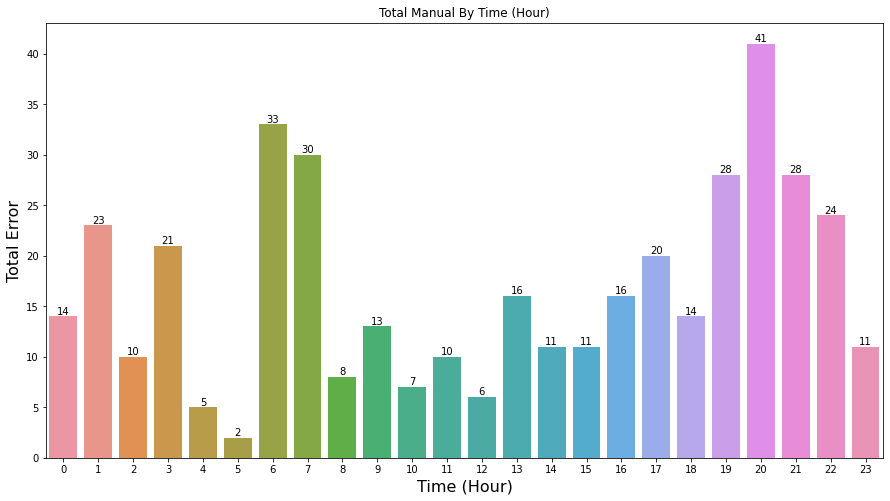

In [53]:
plt.figure(figsize=(15,8))
ax2 = sns.barplot(x='Time (Hour)', y='Total', data=data2_hour)
for i in ax2.containers:
    ax2.bar_label(i,)

plt.title('Total Manual By Time (Hour)')
plt.ylabel('Total Error', fontsize=16)
plt.xlabel('Time (Hour)', fontsize=16)

In [54]:
range_time = []

for i, j in data2_hour.iterrows(): 
    if j['Time (Hour)'] <= 18 and j['Time (Hour)'] >= 6:
        time = 'Siang'
    else:
        time = 'Malam'
    range_time.append(time)

In [55]:
data2_hour['RangeTime'] = range_time


In [56]:
data2_range_hour = pd.DataFrame(data2_hour.groupby('RangeTime', as_index=False)['Total'].sum())

In [57]:
data2_range_hour.sort_values(by=['Total']).reset_index(drop=True)

,RangeTime,Total
0,Siang,195
1,Malam,207


Text(0.5, 0, 'Range Time')

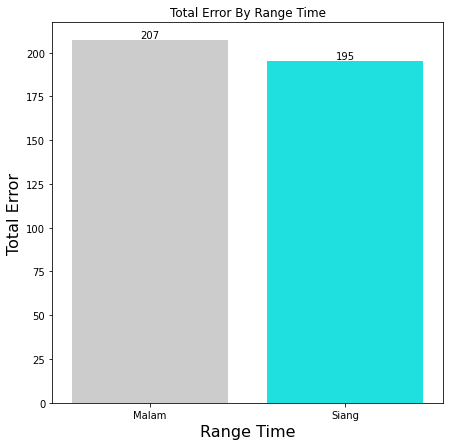

In [58]:
plt.figure(figsize=(7,7))
flatui = ["#CCCCCC","cyan"]
sns.set_palette(flatui)


ax3 = sns.barplot(x='RangeTime', y='Total', data=data2_range_hour)
for i in ax3.containers:
    ax3.bar_label(i,)

plt.title('Total Error By Range Time')
plt.ylabel('Total Error', fontsize=16)
plt.xlabel('Range Time', fontsize=16)

Text(0, 0.5, 'Total (%)')

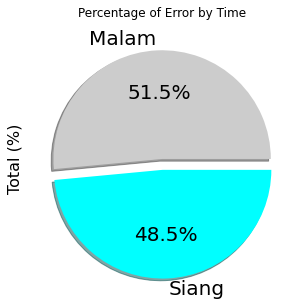

In [59]:
colors =['navy','cyan']
plt.figure(figsize=(7,5))
data2_hour.groupby('RangeTime')['Total'].sum().plot.pie(title='Percentage of Error by Time', 
                                                        fontsize = 20, explode=[0,.1], autopct="%.1f%%", colors=['#CCCCCC','cyan'],
                                                        shadow = True, textprops={'fontsize': 18})
plt.ylabel('Total (%)', fontsize=16)

# Revisi

In [60]:
data_auto = df_success.loc[df_success['GATE PROCESS']=='Auto'].reset_index(drop=True)

In [61]:
data_auto_hour = pd.DataFrame(data_auto['Hour'].value_counts()).reset_index().rename(columns={'index':'Time (Hour)','Hour':'Auto'})

In [62]:
data_auto_hour = data_auto_hour.sort_values(by=['Time (Hour)']).reset_index(drop=True)

In [63]:
data_auto_hour

,Time (Hour),Auto
0,0,68
1,1,133
2,2,57
3,3,59
4,4,22
5,5,11
6,6,185
7,7,187
8,8,68
9,9,138


In [64]:
range_time = []

for i, j in data_auto_hour.iterrows(): 
    if j['Time (Hour)'] <= 18 and j['Time (Hour)'] >= 6:
        time = 'Siang'
    else:
        time = 'Malam'
    range_time.append(time)

In [65]:
data_auto_hour['RangeTime'] = range_time

In [66]:
data_sum_auto = pd.DataFrame(data_auto_hour.groupby('RangeTime', as_index=False)['Auto'].sum())

In [67]:
data_sum_auto

,RangeTime,Auto
0,Malam,1283
1,Siang,1514


In [68]:
data_sum_manual = data2_range_hour

In [69]:
data_sum_manual = data_sum_manual.rename(columns={'Total':'Manual'})

In [70]:
data_sum_manual

,RangeTime,Manual
0,Malam,207
1,Siang,195


In [71]:
data_manual_auto = pd.merge(data_sum_auto,data_sum_manual, on = 'RangeTime')

In [72]:
data_manual_auto = data_manual_auto.set_index('RangeTime').T.reset_index()

In [73]:
data_manual_auto = data_manual_auto.rename_axis(None, axis=1).rename(columns={'index':'RangeTime'})

In [74]:
data_manual_auto

,RangeTime,Malam,Siang
0,Auto,1283,1514
1,Manual,207,195


Text(0, 0.5, 'Total Malam (%)')

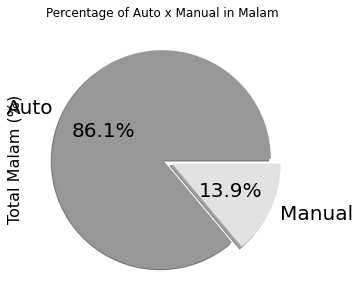

In [75]:

plt.figure(figsize=(7,5))
data_manual_auto.groupby('RangeTime')['Malam'].sum().plot.pie(title='Percentage of Auto x Manual in Malam', 
                                                        fontsize = 20, explode=[0,.1], autopct="%.1f%%", colors=['#979899','#e1e3e1'],
                                                        shadow = True, textprops={'fontsize': 18})
plt.ylabel('Total Malam (%)', fontsize=16)

Text(0, 0.5, 'Total Siang (%)')

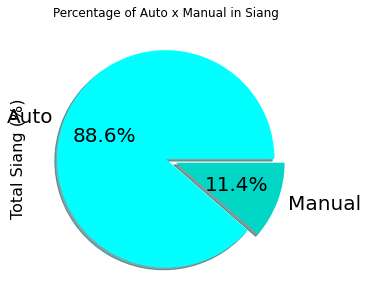

In [76]:

plt.figure(figsize=(7,5))
data_manual_auto.groupby('RangeTime')['Siang'].sum().plot.pie(title='Percentage of Auto x Manual in Siang', 
                                                        fontsize = 20, explode=[0,.1], autopct="%.1f%%", colors=['cyan','#02d6c5'],
                                                        shadow = True, textprops={'fontsize': 18})

plt.ylabel('Total Siang (%)', fontsize=16)